In [22]:
LandAreaEurope = 1.18e13;
populationEurope = 740.0e6;
powerPerPerson = 200.0e3/24.0;
electricityPerPerson = 14.0e3/24.0;
primaryEnergyPerPerson = 110.0e3/24.0;

In [12]:
powerSolar_per_sqm=40.0;
powerWind_per_sqm=3.0;

solarAreaTotalEnergy = powerPerPerson*populationEurope/powerSolar_per_sqm;
windAreaTotalEnergy = powerPerPerson*populationEurope/powerWind_per_sqm;
solarAreaElec = electricityPerPerson*populationEurope/powerSolar_per_sqm;
windAreaElec = electricityPerPerson*populationEurope/powerWind_per_sqm;

europeSolarCurrent=90e9
effectiveSolarArea=europeSolarCurrent/powerSolar_per_sqm;

In [13]:
import matplotlib as mpl
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

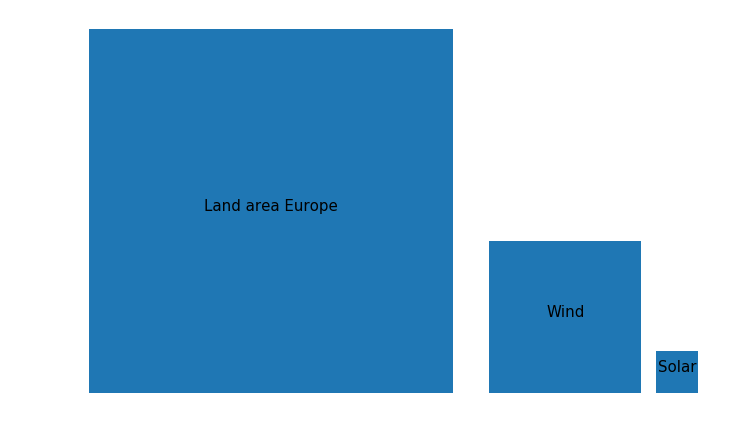

In [14]:
import matplotlib.patches as patches

fig,ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
ax.set_aspect('equal')

used_area = [0.0,0.0] 
square_dim = np.sqrt(LandAreaEurope)
p=patches.Rectangle((used_area[0], used_area[1]), square_dim, square_dim,facecolor=None)
ax.add_patch(p)
ax.text(used_area[0] + square_dim/2, used_area[1] + square_dim/2, r'Land area Europe', fontsize=15, horizontalalignment='center')
used_area[0] = used_area[0] + square_dim*1.1

square_dim = np.sqrt(windAreaTotalEnergy)
p=patches.Rectangle((used_area[0], used_area[1]), square_dim, square_dim,facecolor=None)
ax.add_patch(p)
ax.text(used_area[0] + square_dim/2, used_area[1] + square_dim/2, r'Wind', fontsize=15, horizontalalignment='center')
used_area[0] = used_area[0] + square_dim*1.1

square_dim = np.sqrt(solarAreaTotalEnergy)
p=patches.Rectangle((used_area[0], used_area[1]), square_dim, square_dim,facecolor=None)
ax.add_patch(p)
ax.text(used_area[0] + square_dim/2, used_area[1] + square_dim/2, r'Solar', fontsize=15, horizontalalignment='center')
used_area[0] = used_area[0] + square_dim*1.1


ax.autoscale()

In [15]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

from geonamescache import GeonamesCache
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [16]:
def meters_per_degree_lat(rlat): 
    return 111693.97955992134774 / (1 + 0.0067394967565868823004*np.cos((np.pi/180)*rlat)**2)**(1.5) 
def meters_per_degree_lon(rlat): 
    return 111693.97955992134774 * np.cos(rlat)/(1 + 0.0067394967565868823004*np.cos((np.pi/180)*rlat)**2)**(0.5) 


In [17]:
def draw_screen_square(m,centrelat,centrelon, width_meters, resolution=10,facecolor='red',label=''):
    width_lat = width_meters/meters_per_degree_lat(centrelat)
    width_lon = width_meters/meters_per_degree_lon(centrelat)

    lats = [centrelat-width_lat/2,centrelat-width_lat/2,centrelat+width_lat/2,centrelat+width_lat/2]
    lons = [centrelon-width_lon/2,centrelon+width_lon/2,centrelon+width_lon/2,centrelon-width_lon/2]
    x = np.array([])
    y = np.array([])
    
    for i in range(4):
        
        lats_int = np.linspace( lats[0], lats[1], resolution )
        lons_int = np.linspace( lons[0], lons[1], resolution )
        xt, yt = m( lons_int, lats_int )
        lats = np.roll(lats,-1)
        lons = np.roll(lons,-1)
        x=np.append(x,xt)
        y=np.append(y,yt)
    xy = zip(x,y)
    poly = Polygon( xy, facecolor=facecolor,edgecolor='black', alpha=0.4 )
    plt.gca().add_patch(poly)
    
    if label != '':
        xt,yt=map(centrelon,centrelat)
        plt.text(xt,yt, label, fontsize=12,horizontalalignment='center',verticalalignment='center')



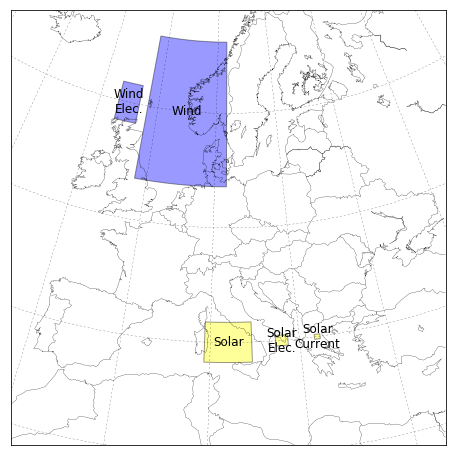

In [18]:
fig,ax = plt.subplots(figsize=(12, 8))

map = Basemap(projection='aea',lat_0=50,lon_0=12,width=4.2e6,height=4.2e6,resolution='l')

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)

draw_screen_square(map,40,12,np.sqrt(solarAreaTotalEnergy),label='Solar',facecolor='yellow')
draw_screen_square(map,60,5,np.sqrt(windAreaTotalEnergy),label='Wind',facecolor='blue')

draw_screen_square(map,40,18,np.sqrt(solarAreaElec),label='Solar\nElec.',facecolor='yellow')
draw_screen_square(map,60,-5,np.sqrt(windAreaElec),label='Wind\nElec.',facecolor='blue')


draw_screen_square(map,40,22,np.sqrt(effectiveSolarArea),label='Solar\nCurrent',facecolor='yellow')

# map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
# map.drawmapboundary(fill_color='aqua')
map.drawparallels(np.arange(-80.,81.,10.),linewidth=0.2)
map.drawmeridians(np.arange(-180.,181.,10.),linewidth=0.2);